In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [4]:
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
#plt.rcParams['image.cmap']='gray'

- PCA와 t-SNE의 비교

In [5]:
digits = load_digits()

In [7]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

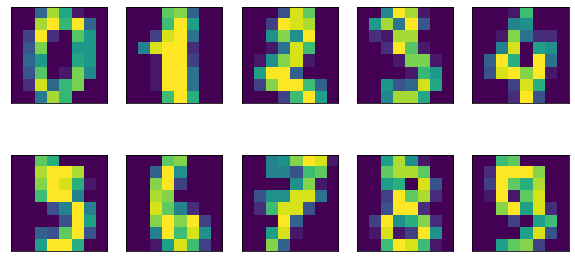

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [9]:
#PCA
#모델 선언
pca = PCA(n_components=2)

#모델 학습
pca.fit(digits.data)

PCA(n_components=2)

In [10]:
#데이터 변환
digit_pca = pca.transform(digits.data)

In [11]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]


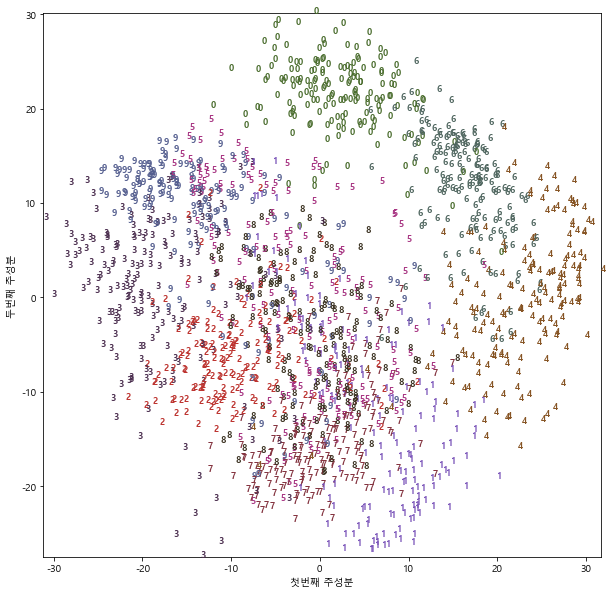

In [17]:
plt.figure(figsize=(10, 10))
plt.xlim(digit_pca[:,0].min(), digit_pca[:,0].max())
plt.ylim(digit_pca[:,1].min(), digit_pca[:,1].max())

for i in range(len(digits.data)):
    #숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digit_pca[i, 0], digit_pca[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight':'bold', 'size':9})
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()

- t-SNE: 시각화에 유용한 알고리즘?

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne= tsne.fit_transform(digits.data)

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


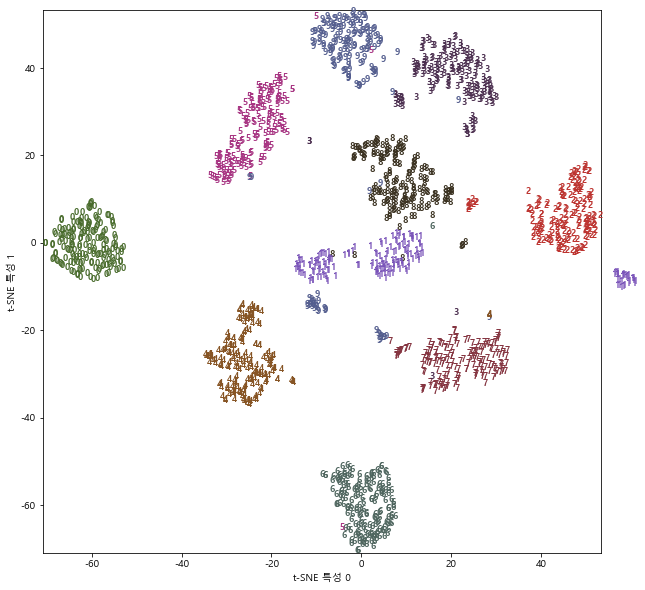

In [24]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 1].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    #숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight':'bold', 'size':9})
plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1')
plt.show()